In [1]:
import os

def count_files_in_directory(dir_path):
    return len([file for file in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, file))])

# Example usage
dir_path = 'NFT/data/ecg/csv_files'
number_of_files = count_files_in_directory(dir_path)
number_of_files


10344

In [6]:
import os

def list_of_csv(dir_path):
    files = []
    for file in os.listdir(dir_path):
        if file.endswith('.csv'):
            filename, _ = os.path.splitext(file)  # Split the extension and ignore it
            files.append(filename)
    return files

dir_path = 'NFT/data/ecg/csv_files'
print(list_of_csv(dir_path))


['E00001', 'E00002', 'E00003', 'E00004', 'E00005', 'E00006', 'E00007', 'E00008', 'E00009', 'E00010', 'E00011', 'E00012', 'E00013', 'E00014', 'E00015', 'E00016', 'E00017', 'E00018', 'E00019', 'E00020', 'E00021', 'E00022', 'E00023', 'E00024', 'E00025', 'E00026', 'E00027', 'E00028', 'E00029', 'E00030', 'E00031', 'E00032', 'E00033', 'E00034', 'E00035', 'E00036', 'E00037', 'E00038', 'E00039', 'E00040', 'E00041', 'E00042', 'E00043', 'E00044', 'E00045', 'E00046', 'E00047', 'E00048', 'E00049', 'E00050', 'E00051', 'E00052', 'E00053', 'E00054', 'E00055', 'E00056', 'E00057', 'E00058', 'E00059', 'E00060', 'E00061', 'E00062', 'E00063', 'E00064', 'E00065', 'E00066', 'E00067', 'E00068', 'E00069', 'E00070', 'E00071', 'E00072', 'E00073', 'E00074', 'E00075', 'E00076', 'E00077', 'E00078', 'E00079', 'E00080', 'E00081', 'E00082', 'E00083', 'E00084', 'E00085', 'E00086', 'E00087', 'E00088', 'E00089', 'E00090', 'E00091', 'E00092', 'E00093', 'E00094', 'E00095', 'E00096', 'E00097', 'E00098', 'E00099', 'E00100',

In [1]:
import pandas as pd
import os

def clean_and_save_csv(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List to keep track of files with missing columns
    bad_files = []

    # Iterate over each file in the input directory
    for file in os.listdir(input_dir):
        if file.endswith('.csv'):
            file_path = os.path.join(input_dir, file)
            # Read CSV file
            df = pd.read_csv(file_path)

            # Check if all required columns are present
            required_columns = ['TMIN', 'TMAX', 'TAVG']
            if not all(col in df.columns for col in required_columns):
                bad_files.append(file)
                continue

            # Keep only specified columns
            df = df[required_columns]

            # Impute missing data
            # Here, we use the mean for imputation, but you can choose another method
            df = df.fillna(df.mean())

            # Save the cleaned and imputed data to a new CSV file in the output directory
            output_file_path = os.path.join(output_dir, file)
            df.to_csv(output_file_path, index=False)

    return bad_files

input_directory = '/home/noam.koren/multiTS/NFT/data/noaa/noaa_ghcn'
output_directory = '/home/noam.koren/multiTS/NFT/data/noaa/noaa_ghcn'

bad_files = clean_and_save_csv(input_directory, output_directory)


In [2]:
import pandas as pd
import os

def clean_and_save_csv(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List to keep track of files with missing columns
    bad_files = []

    # Iterate over each file in the input directory
    for file in os.listdir(input_dir):
        if file.endswith('.csv'):
            file_path = os.path.join(input_dir, file)
            # Read CSV file
            df = pd.read_csv(file_path)

            # Check if all required columns are present
            required_columns = ['PRCP', 'TMIN', 'TMAX', 'TAVG']
            if not all(col in df.columns for col in required_columns):
                bad_files.append(file)
                continue

            # Keep only specified columns
            df = df[required_columns]

            # Remove rows with NaN in specified columns
            df = df.dropna(subset=['TMIN', 'TMAX', 'TAVG'])

            # Save the cleaned data to a new CSV file in the output directory
            output_file_path = os.path.join(output_dir, file)
            df.to_csv(output_file_path, index=False)

    return bad_files

input_directory = '/home/noam.koren/multiTS/NFT/data/noaa/noaa_ghcn'
output_directory = '/home/noam.koren/multiTS/NFT/data/noaa/noaa_ghcn'

clean_and_save_csv(input_directory, output_directory)


['AE000041196.csv', 'AEM00041194.csv', 'AEM00041217.csv']

In [3]:
import pandas as pd
import torch

p = "NFT/data/noaa/noaa_ghcn/"
station = "AEM00041194"
file_path = p + "original_data/" + station + '.csv'  
data = pd.read_csv(file_path)

print("Basic Information about the Dataset:")
# print(data.info())
# print(data.shape)

selected_columns = ['PRCP', 'TMIN', 'TMAX', 'TAVG']
df_selected = data[selected_columns]

print(df_selected.head())

output_csv_path = p + station + '.csv'
df_selected.to_csv(output_csv_path, index=False)

Basic Information about the Dataset:
   PRCP   TMIN   TMAX  TAVG
0   NaN  140.0  276.0   195
1   NaN  134.0  302.0   198
2   NaN  143.0  252.0   191
3   NaN  158.0  235.0   194
4   NaN  145.0    NaN   185


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
models_path = "/home/noam.koren/multiTS"
if models_path not in sys.path: sys.path.append(models_path)
from NFT.data.proccess_data_functions import plot_df


df = pd.read_pickle('/home/noam.koren/multiTS/NFT/data/noaa/noaa_ghcn/noaa_pkl/noaa_AE000041196_1955.pkl')


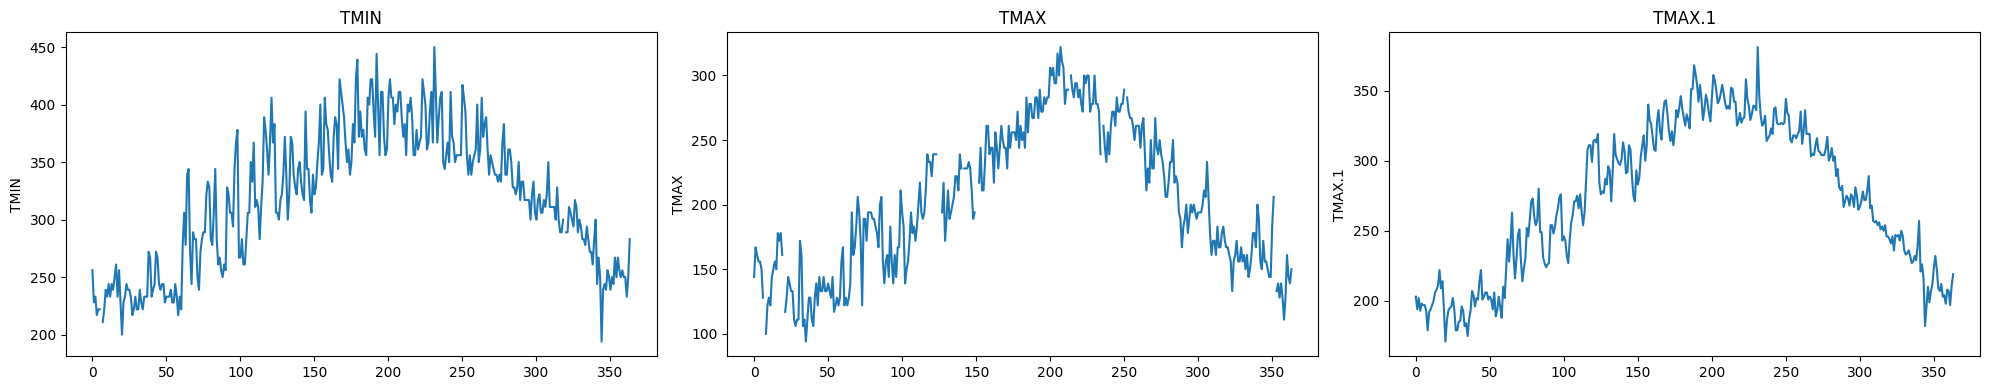

In [2]:
plot_df(df)